CSVファイル 'data_effective_potential.csv' が生成されました。


PDFファイル 'figA2_effective_potential.pdf' が生成されました。


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

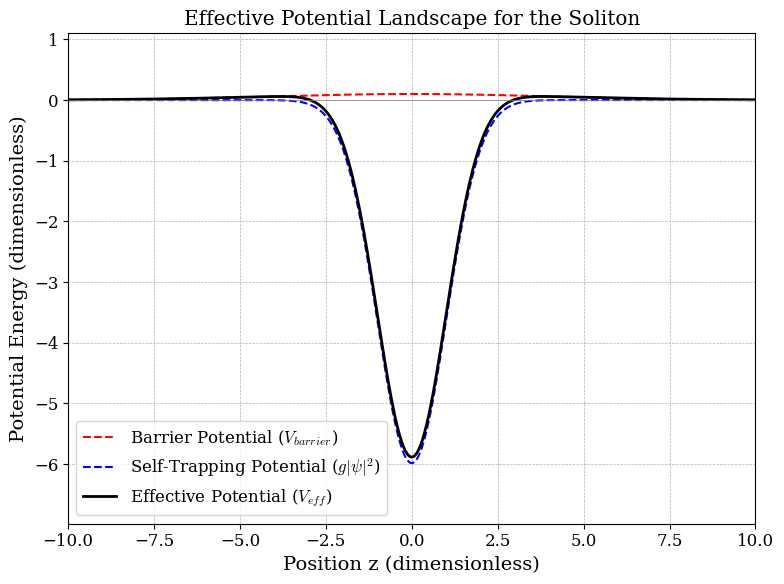

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd  # ★★★ pandasをインポート ★★★
from google.colab import files

# ===================================================================
# --- グラフ品質と一貫性のための最終設定 (v5.0準拠) ---
# ===================================================================
# (変更なし)
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman', 'DejaVu Serif']
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['mathtext.fontset'] = 'cm'

# ===================================================================
# --- パラメータ定義 (論文と整合) ---
# ===================================================================
# (変更なし)
A = 0.1
sigma = 4.0
g = -15.0
sigma_soliton = 1.0
norm_factor = 1 / (sigma_soliton * np.sqrt(2 * np.pi))
z = np.linspace(-10, 10, 1000)

# ===================================================================
# --- 各ポテンシャルの計算 ---
# ===================================================================
# (変更なし)
V_barrier = A * np.exp(-z**2 / (2 * sigma**2))
psi_squared = norm_factor * np.exp(-z**2 / (2 * sigma_soliton**2))
V_self = g * psi_squared
V_eff = V_barrier + V_self

# ===================================================================
# ★★★ ここからが修正・追加部分です ★★★
# ===================================================================
# --- データをDataFrameに格納し、CSVとして保存 ---
df_potential = pd.DataFrame({
    'z_position': z,
    'V_barrier': V_barrier,
    'V_self_trapping': V_self,
    'V_effective': V_eff,
    'psi_squared_density': psi_squared
})

csv_filename = 'data_effective_potential.csv'
df_potential.to_csv(csv_filename, index=False)
print(f"CSVファイル '{csv_filename}' が生成されました。")
# ===================================================================

# ===================================================================
# --- グラフ描画 ---
# ===================================================================
# (変更なし)
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(z, V_barrier, 'r--', label='Barrier Potential ($V_{barrier}$)')
ax.plot(z, V_self, 'b--', label='Self-Trapping Potential ($g|\\psi|^2$)')
ax.plot(z, V_eff, 'k-', linewidth=2, label='Effective Potential ($V_{eff}$)')
ax.set_xlabel('Position z (dimensionless)')
ax.set_ylabel('Potential Energy (dimensionless)')
ax.set_title('Effective Potential Landscape for the Soliton')
ax.legend()
ax.grid(True, linestyle='--', linewidth=0.5)
ax.axhline(0, color='gray', linewidth=0.5)
ax.set_ylim(V_self.min() - 1, V_barrier.max() + 1)
ax.set_xlim(-10, 10)
plt.tight_layout()

# ===================================================================
# --- ファイル出力とダウンロード ---
# ===================================================================
# PDFファイルとして保存
pdf_filename = 'figA2_effective_potential.pdf'
plt.savefig(pdf_filename, format='pdf', bbox_inches='tight')
print(f"PDFファイル '{pdf_filename}' が生成されました。")

# --- ファイルの自動ダウンロード (CSVも追加) ---
files.download(csv_filename) # ★★★ CSVのダウンロードを追加 ★★★
files.download(pdf_filename)